In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Import Dataset 
1. Since data is form of csv file we have to use pandas read_csv to load the data.
2. Now after loading the data we have to look into data to know its structure.
3. We have to understand the problem.

In [2]:
df= pd.read_csv('flight_data.csv')

In [3]:
df.head(100)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0
...,...,...,...,...,...,...,...,...,...
95,IndiGo,21-06-2019,Chennai,Kolkata,MAA → CCU,05:15,non-stop,145,3540.0
96,SpiceJet,15-05-2019,Banglore,Delhi,BLR → DEL,05:55,non-stop,160,3257.0
97,Jet Airways,03-06-2019,Banglore,Delhi,BLR → DEL,19:50,non-stop,180,6478.0
98,Jet Airways,18-06-2019,Mumbai,Hyderabad,BOM → HYD,07:05,non-stop,85,8040.0


In [4]:
df.isna().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Total_Stops              1
total_duration_min       0
Price                 2670
dtype: int64

# Null val
1.Here we can see our target column that is price is null that should be seprated in further future processing

# Seperating datapoint where target value is null

In [5]:
main_train = df[df.Price.isnull()==False]
main_test = df[df.Price.isnull()]

In [6]:
#Preprocess the data 
main_train.shape

(10682, 9)

In [7]:
main_test.shape

(2670, 9)

1. We can see the target value that are null are now seperated as main test df and will be our main test at last step.

2. Now we need to carry process forward with main_train.

In [8]:
main_train.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Total_Stops           1
total_duration_min    0
Price                 0
dtype: int64

# Preprocessing ###

Checking Null Imputation

In [9]:
main_train[main_train.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,NaN,1420,7480.0


In [10]:
#Dropping the record contating null value as the Route is MCAR and Total stops is related + single row so doesnot matter much
main_train = main_train[main_train.Route.isnull()==False]

In [11]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10681
Data columns (total 9 columns):
Airline               10681 non-null object
Date_of_Journey       10681 non-null object
Source                10681 non-null object
Destination           10681 non-null object
Route                 10681 non-null object
Dep_Time              10681 non-null object
Total_Stops           10681 non-null object
total_duration_min    10681 non-null int64
Price                 10681 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 834.5+ KB


## Date time conversion

In [12]:
main_train['Date_of_Journey'] = pd.to_datetime(main_train['Date_of_Journey'])

In [13]:
main_train.cov()

,total_duration_min,Price
total_duration_min,2.578775e+05,1.186720e+06
Price,1.186720e+06,2.126202e+07


In [14]:
main_train.nunique()

Airline                 12
Date_of_Journey         40
Source                   5
Destination              6
Route                  128
Dep_Time               222
Total_Stops              5
total_duration_min     367
Price                 1870
dtype: int64

In [15]:
# For catagorical columns
# if unique count ==1 , constant column 


for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('____________________*_____________________')

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
____________________*_____________________
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64
____________________*_____________________
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64
____________________*_____________________
1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Na

In [16]:
main_train['Airline'].nunique()

12

In [17]:
#here in the above we can club airlines

main_train['Airline'] = np.where(main_train['Airline'].isin(["Multiple carriers Premium economy",
                                                             "Jet Airways Business",
                                                             "Vistara Premium economy",
                                                             "Trujet"]),"Other Airlines",main_train['Airline'])


In [18]:
main_train['Airline'].nunique()

9

In [19]:
main_train.sort_values(by=['Date_of_Journey'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
3835,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,09:00,non-stop,150,5515.0
7355,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,00:20,1 stop,780,29528.0
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,1 stop,380,26890.0
3545,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,2 stops,1580,19372.0
3543,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,non-stop,175,10067.0
...,...,...,...,...,...,...,...,...,...
4046,Multiple carriers,2019-12-06,Delhi,Cochin,DEL → BOM → COK,09:00,1 stop,615,14848.0
4038,Jet Airways,2019-12-06,Kolkata,Banglore,CCU → BOM → BLR,20:00,1 stop,520,12576.0
4030,Jet Airways,2019-12-06,Delhi,Cochin,DEL → ATQ → BOM → COK,18:20,2 stops,1480,14300.0
4271,Jet Airways,2019-12-06,Delhi,Cochin,DEL → ATQ → BOM → COK,08:10,2 stops,1215,14300.0


In [20]:
main_train["Journey_day"] =pd.to_datetime(main_train["Date_of_Journey"],format="%d/%m/%Y").dt.day
main_train["Journey_month"] =pd.to_datetime(main_train["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [21]:
main_train["Journey_year"] =pd.to_datetime(main_train["Date_of_Journey"],format="%d/%m/%Y").dt.year



In [22]:
main_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,non-stop,150,4107.0,4,9,2019
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,non-stop,155,4145.0,27,4,2019
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,non-stop,180,7229.0,27,4,2019
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,non-stop,160,12648.0,3,1,2019


In [23]:
#since we have extracted all info from Date_of_journey we can drop that column
main_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [24]:
main_train

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,non-stop,150,4107.0,4,9,2019
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,non-stop,155,4145.0,27,4,2019
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,non-stop,180,7229.0,27,4,2019
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,non-stop,160,12648.0,3,1,2019


# extracting more info
We have to extract much more info from date time so that our model predicts the prices more accurately

In [25]:
# Departure time is when a plane leaves the gate of airport 
#Extracting Hours 
main_train["Dep_hour"] = pd.to_datetime(main_train["Dep_Time"]).dt.hour

# Extracting Minutes 
main_train["Dep_min"] = pd.to_datetime(main_train["Dep_Time"]).dt.minute


In [26]:
main_train

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0,3,1,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,non-stop,150,4107.0,4,9,2019,19,55
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,non-stop,155,4145.0,27,4,2019,20,45
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,non-stop,180,7229.0,27,4,2019,8,20
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,non-stop,160,12648.0,3,1,2019,11,30


In [27]:
# Now we can drop Dep_Time as we have extracted information from it
main_train.drop(["Dep_Time"], axis = 1, inplace = True)

extracting duration info based on which model will work more efficiently

In [28]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
#duration = list(main_train["Duration"])

#for i in range(len(duration)):
#    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
#        if "h" in duration[i]:
#            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
#        else:
#           duration[i] = "0h " + duration[i]           # Adds 0 hour

#duration_hours = []
#duration_mins = []
#for i in range(len(duration)):
 #   duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
  #  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In the above given data set duration in minutes is already given but if it is not given the above code can be used.

In [29]:
main_train.corr().loc['total_duration_min',:]

total_duration_min    1.000000
Price                 0.506803
Journey_day          -0.038495
Journey_month         0.055158
Journey_year               NaN
Dep_hour              0.002160
Dep_min              -0.018941
Name: total_duration_min, dtype: float64

#  Split Data

In [30]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = main_train.drop('Price',axis=1)

# y --> contains only the target value 
y = main_train['Price']

In [31]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [32]:
# 
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [33]:
X_train.shape , X_val.shape , X_test.shape

((7476, 11), (1602, 11), (1603, 11))

# Performing EDA

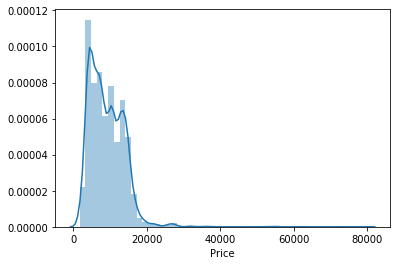

In [34]:
sns.distplot(y_train)

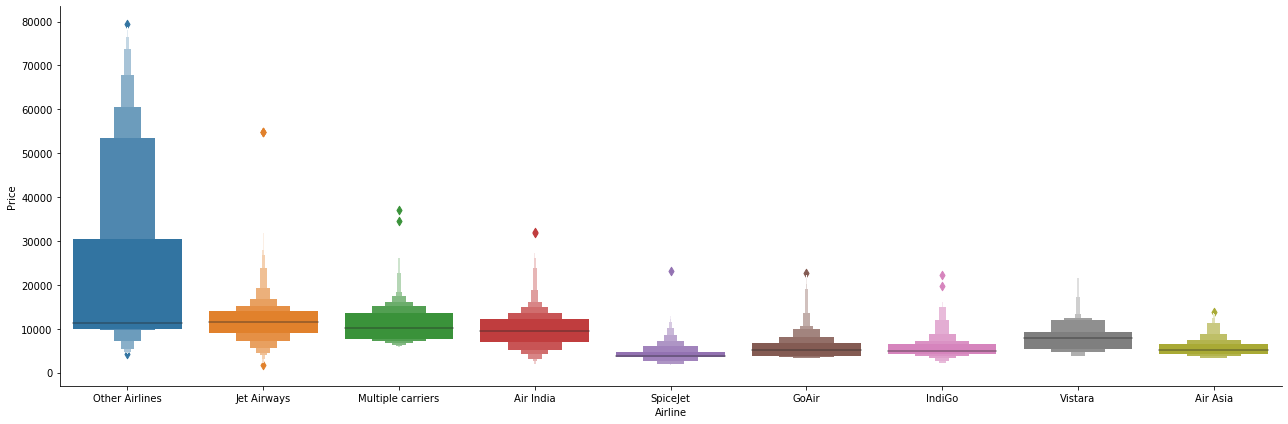

In [35]:
sns.catplot(y= "Price", x = "Airline", data = main_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

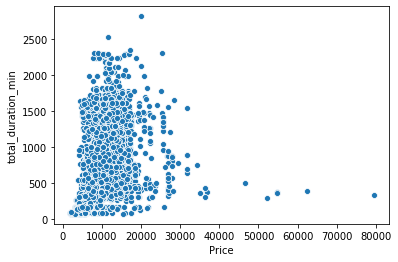

In [36]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="total_duration_min")

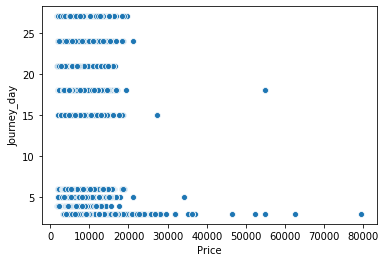

In [37]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="Journey_day")

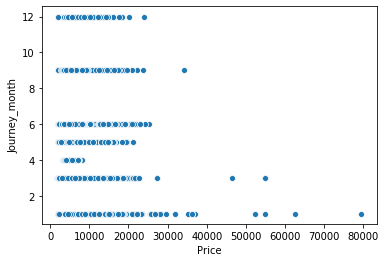

In [38]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="Journey_month")

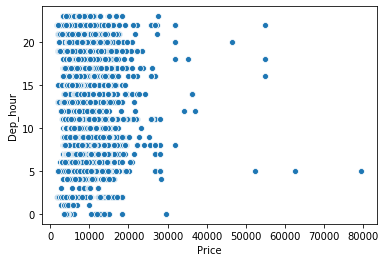

In [39]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="Dep_hour")

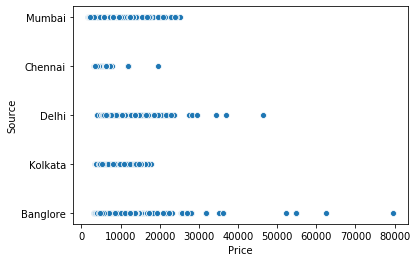

In [40]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="Source")

In [41]:
X_train.Route.nunique()

122

In [42]:
# cheapest / costliest --> flights per route 
# flights which provides services to most of the routes   
X_train.merge(y_train,on = X_train.index).groupby(['Route','Airline'])['Price'].agg(['min']).unstack().T.idxmin()

Route
BLR → AMD → DEL                    (min, Vistara)
BLR → BBI → DEL                  (min, Air India)
BLR → BDQ → DEL                (min, Jet Airways)
BLR → BOM → AMD → DEL            (min, Air India)
BLR → BOM → BHO → DEL            (min, Air India)
                                      ...        
DEL → PNQ → COK                   (min, SpiceJet)
DEL → RPR → NAG → BOM → COK      (min, Air India)
DEL → TRV → COK                     (min, IndiGo)
DEL → UDR → BOM → COK            (min, Air India)
MAA → CCU                        (min, Air India)
Length: 122, dtype: object

In [43]:
X_train.merge(y_train , on = X_train.index).groupby(['Total_Stops','Airline'])['Price'].agg(['min']).unstack().T.idxmin()

Total_Stops
1 stop         (min, IndiGo)
2 stops     (min, Air India)
3 stops     (min, Air India)
non-stop     (min, SpiceJet)
dtype: object

# Feature engineering

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 11 columns):
Airline               7476 non-null object
Source                7476 non-null object
Destination           7476 non-null object
Route                 7476 non-null object
Total_Stops           7476 non-null object
total_duration_min    7476 non-null int64
Journey_day           7476 non-null int64
Journey_month         7476 non-null int64
Journey_year          7476 non-null int64
Dep_hour              7476 non-null int64
Dep_min               7476 non-null int64
dtypes: int64(6), object(5)
memory usage: 700.9+ KB


In [45]:
#We are encoding it just to convert airline into int 

from sklearn.preprocessing import LabelEncoder
Airline_encoder = LabelEncoder()
Airline_encoder.fit(X_train['Airline'])
X_train['Airline_enc'] = Airline_encoder.transform(X_train['Airline'])

In [46]:
X_train[['Airline_enc','Airline']]

,Airline_enc,Airline
0,3,IndiGo
1,1,Air India
2,4,Jet Airways
3,3,IndiGo
4,3,IndiGo
...,...,...
7471,1,Air India
7472,4,Jet Airways
7473,4,Jet Airways
7474,4,Jet Airways


In [47]:
X_val['Airline_enc'] = Airline_encoder.transform(X_val['Airline'])
X_test['Airline_enc'] = Airline_encoder.transform(X_test['Airline'])


In [48]:
X_train.drop(['Airline'], axis =1,inplace=True)
X_val.drop(['Airline'],axis=1 , inplace=True)
X_test.drop(['Airline'],axis=1 , inplace=True)



In [49]:
X_train.info() #now we have made an airline_enc colimn having encoded airline info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 11 columns):
Source                7476 non-null object
Destination           7476 non-null object
Route                 7476 non-null object
Total_Stops           7476 non-null object
total_duration_min    7476 non-null int64
Journey_day           7476 non-null int64
Journey_month         7476 non-null int64
Journey_year          7476 non-null int64
Dep_hour              7476 non-null int64
Dep_min               7476 non-null int64
Airline_enc           7476 non-null int64
dtypes: int64(7), object(4)
memory usage: 700.9+ KB


In [50]:
# label enceode route as well
route_encoder = LabelEncoder()

route_encoder.fit(X_train['Route'])

X_train['Route_enc'] = route_encoder.transform(X_train['Route'])

In [51]:
diff = set(X_val['Route'])-set(route_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    route_encoder.classes_ = np.append(route_encoder.classes_,items)



In [52]:
X_val['Route_enc'] = route_encoder.transform(X_val['Route'])

In [53]:
diff2 = set(X_test['Route'])-set(route_encoder.classes_)
for items in diff2:
    route_encoder.classes_ = np.append(route_encoder.classes_,items)



In [54]:
X_test['Route_enc'] = route_encoder.transform(X_test['Route'])

In [55]:
X_train.drop(['Route'], axis =1,inplace=True)
X_val.drop(['Route'],axis=1 , inplace=True)
X_test.drop(['Route'],axis=1 , inplace=True)


In [56]:
X_train

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Airline_enc,Route_enc
0,Banglore,New Delhi,non-stop,170,24,3,2019,22,20,3,16
1,Kolkata,Banglore,2 stops,445,5,1,2019,5,50,1,78
2,Delhi,Cochin,2 stops,1140,6,9,2019,9,25,4,112
3,Kolkata,Banglore,1 stop,325,5,12,2019,18,5,3,85
4,Banglore,New Delhi,1 stop,285,3,1,2019,16,50,3,26
...,...,...,...,...,...,...,...,...,...,...,...
7471,Delhi,Cochin,1 stop,555,3,6,2019,10,0,1,98
7472,Kolkata,Banglore,1 stop,510,21,5,2019,14,5,4,60
7473,Delhi,Cochin,1 stop,1010,6,3,2019,19,45,4,98
7474,Kolkata,Banglore,1 stop,1690,24,5,2019,14,5,4,60


In [57]:
X_val

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Airline_enc,Route_enc
7476,Banglore,Delhi,non-stop,170,4,9,2019,17,0,1,16
7477,Delhi,Cochin,1 stop,750,24,6,2019,13,0,5,98
7478,Delhi,Cochin,1 stop,910,27,3,2019,7,10,5,105
7479,Mumbai,Hyderabad,non-stop,90,27,6,2019,22,45,7,44
7480,Delhi,Cochin,1 stop,515,27,3,2019,7,35,3,105
...,...,...,...,...,...,...,...,...,...,...,...
9074,Delhi,Cochin,1 stop,1420,6,6,2019,9,45,1,115
9075,Delhi,Cochin,1 stop,415,6,12,2019,18,35,3,98
9076,Banglore,Delhi,non-stop,180,6,6,2019,19,50,4,16
9077,Kolkata,Banglore,non-stop,150,18,5,2019,17,10,7,58


In [58]:
X_test

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Airline_enc,Route_enc
9079,Banglore,Delhi,non-stop,155,6,12,2019,17,0,8,16
9080,Banglore,Delhi,non-stop,170,4,1,2019,9,30,7,16
9081,Delhi,Cochin,1 stop,390,6,3,2019,19,0,5,98
9082,Kolkata,Banglore,1 stop,1540,5,6,2019,20,25,4,67
9083,Banglore,Delhi,non-stop,170,5,1,2019,9,30,7,16
...,...,...,...,...,...,...,...,...,...,...,...
10677,Kolkata,Banglore,non-stop,150,4,9,2019,19,55,0,58
10678,Kolkata,Banglore,non-stop,155,27,4,2019,20,45,1,58
10679,Banglore,Delhi,non-stop,180,27,4,2019,8,20,4,16
10680,Banglore,New Delhi,non-stop,160,3,1,2019,11,30,8,16


In [59]:
#since we have already extracted information from depar_time we can directly go ahead and use it

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 9079 to 10681
Data columns (total 11 columns):
Source                1603 non-null object
Destination           1603 non-null object
Total_Stops           1603 non-null object
total_duration_min    1603 non-null int64
Journey_day           1603 non-null int64
Journey_month         1603 non-null int64
Journey_year          1603 non-null int64
Dep_hour              1603 non-null int64
Dep_min               1603 non-null int64
Airline_enc           1603 non-null int64
Route_enc             1603 non-null int64
dtypes: int64(8), object(3)
memory usage: 150.3+ KB


In [61]:
# we will encode SOURCE
# make a map dictionary to encode SOURCE column 
labels = X_train['Source'].astype('category').cat.categories.tolist()
mapper1 = {q: w for q,w in zip(labels,list(range(1,len(labels)+1)))}
X_train['Source'] = X_train['Source'].map(mapper1)
X_train['Source'] = X_train['Source'].replace(np.nan, 0)

In [62]:
X_val['Source'] = X_val['Source'].map(mapper1)
X_val['Source'] = X_val['Source'].replace(np.nan, 0)
X_test['Source'] = X_test['Source'].map(mapper1)
X_test['Source'] = X_test['Source'].replace(np.nan, 0)

In [63]:
X_train.info(),X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 11 columns):
Source                7476 non-null int64
Destination           7476 non-null object
Total_Stops           7476 non-null object
total_duration_min    7476 non-null int64
Journey_day           7476 non-null int64
Journey_month         7476 non-null int64
Journey_year          7476 non-null int64
Dep_hour              7476 non-null int64
Dep_min               7476 non-null int64
Airline_enc           7476 non-null int64
Route_enc             7476 non-null int64
dtypes: int64(9), object(2)
memory usage: 700.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 7476 to 9078
Data columns (total 11 columns):
Source                1602 non-null int64
Destination           1602 non-null object
Total_Stops           1602 non-null object
total_duration_min    1602 non-null int64
Journey_day           1602 non-null int64
Journey_month         1602 non-null int64
Journey_year 

(None, None)

In [64]:
# we will encode SOURCE
# make a map dictionary to encode Destination column 
labels = X_train['Destination'].astype('category').cat.categories.tolist()
mapper1 = {q: w for q,w in zip(labels,list(range(1,len(labels)+1)))}
X_train['Destination'] = X_train['Destination'].map(mapper1)
X_train['Destination'] = X_train['Destination'].replace(np.nan, 0)

In [65]:
X_val['Destination'] = X_val['Source'].map(mapper1)
X_val['Destination'] = X_val['Destination'].replace(np.nan, 0)
X_test['Destination'] = X_test['Destination'].map(mapper1)
X_test['Destination'] = X_test['Destination'].replace(np.nan, 0)

In [66]:
X_train["Total_Stops"] = X_train["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_val["Total_Stops"] = X_val["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_test["Total_Stops"] = X_test["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)

In [67]:
X_train.head()

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Airline_enc,Route_enc
0,1,6,0,170,24,3,2019,22,20,3,16
1,4,1,2,445,5,1,2019,5,50,1,78
2,3,2,2,1140,6,9,2019,9,25,4,112
3,4,1,1,325,5,12,2019,18,5,3,85
4,1,6,1,285,3,1,2019,16,50,3,26


In [68]:
X_val.head()

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Airline_enc,Route_enc
7476,1,0.0,0,170,4,9,2019,17,0,1,16
7477,3,0.0,1,750,24,6,2019,13,0,5,98
7478,3,0.0,1,910,27,3,2019,7,10,5,105
7479,5,0.0,0,90,27,6,2019,22,45,7,44
7480,3,0.0,1,515,27,3,2019,7,35,3,105


In [69]:
X_test.head()

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Airline_enc,Route_enc
9079,1,3,0,155,6,12,2019,17,0,8,16
9080,1,3,0,170,4,1,2019,9,30,7,16
9081,3,2,1,390,6,3,2019,19,0,5,98
9082,4,1,1,1540,5,6,2019,20,25,4,67
9083,1,3,0,170,5,1,2019,9,30,7,16


# Feature selection

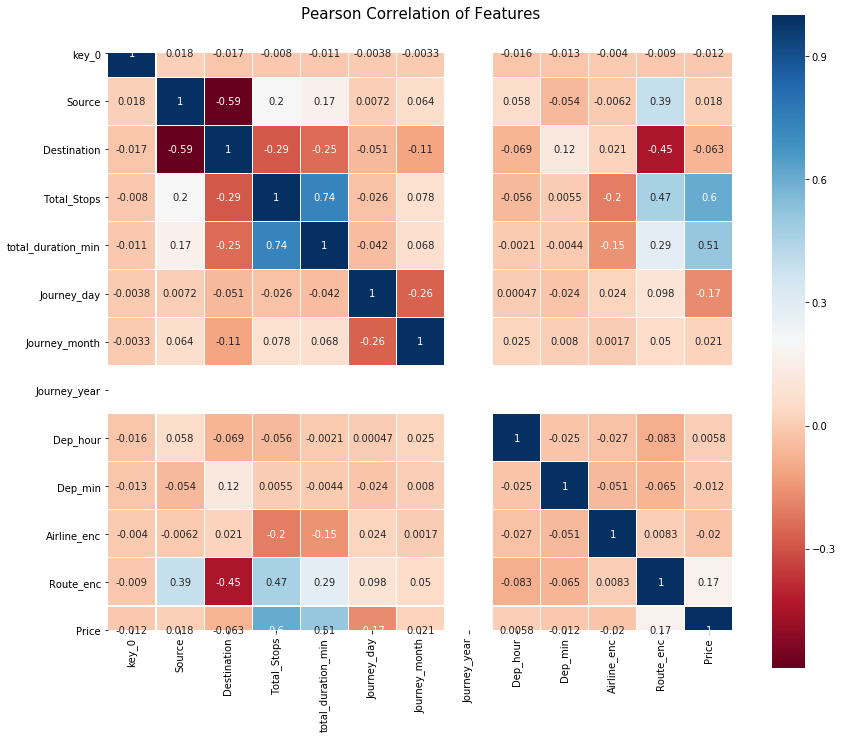

In [70]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [71]:
# here you can see year of journey is a constant column hence should be dropped 
#so we'll drop Journey_year
X_train.drop(['Journey_year'], axis =1,inplace=True)
X_val.drop(['Journey_year'],axis=1 , inplace=True)
X_test.drop(['Journey_year'],axis=1 , inplace=True)


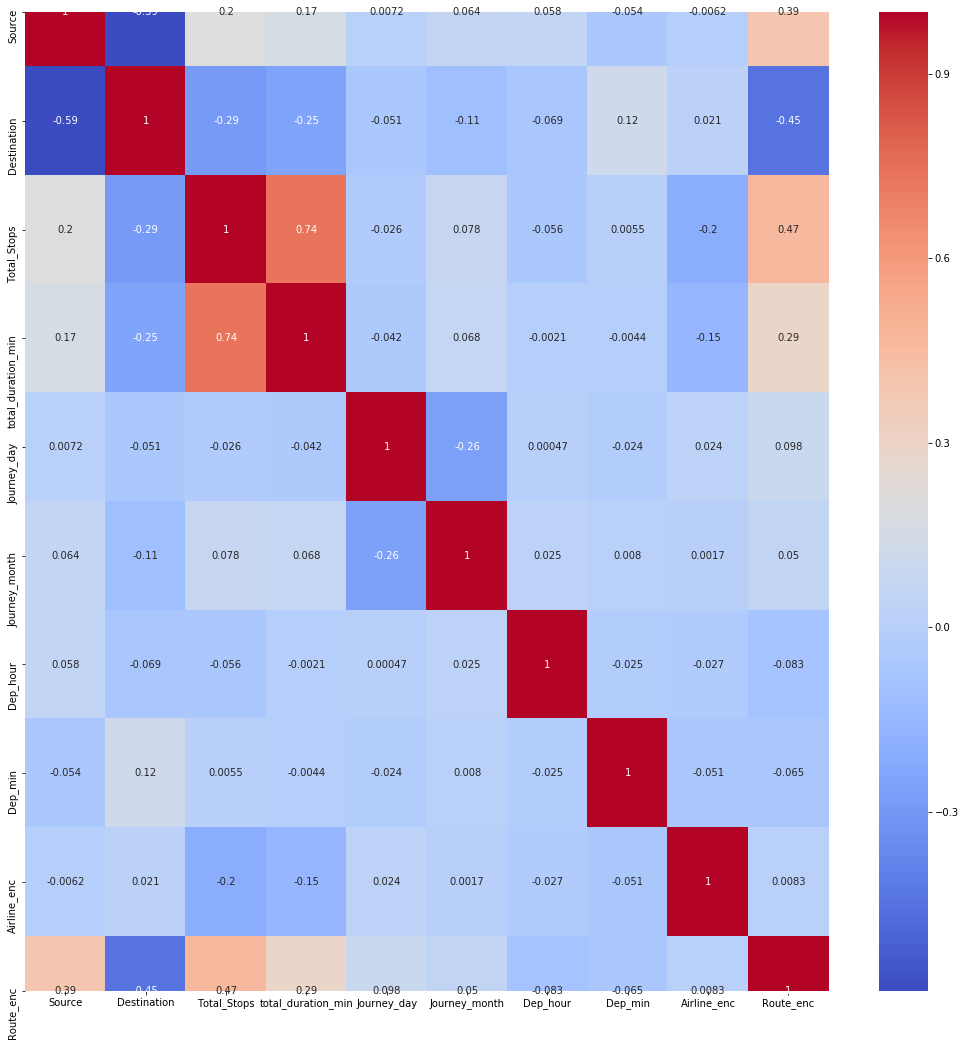

In [72]:
#Find correlation between Independent(X) and dependent attributes(y)

plt.figure(figsize = (18,18))

sns.heatmap(X_train.corr(),annot= True, cmap = "coolwarm")

plt.show()

In [73]:
X_train.columns

Index(['Source', 'Destination', 'Total_Stops', 'total_duration_min',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Airline_enc',
       'Route_enc'],
      dtype='object')

In [74]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;-D

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [75]:
X_test.isna().sum()

Source                0
Destination           0
Total_Stops           0
total_duration_min    0
Journey_day           0
Journey_month         0
Dep_hour              0
Dep_min               0
Airline_enc           0
Route_enc             0
dtype: int64

In [76]:
X_val.isna().sum()

Source                0
Destination           0
Total_Stops           0
total_duration_min    0
Journey_day           0
Journey_month         0
Dep_hour              0
Dep_min               0
Airline_enc           0
Route_enc             0
dtype: int64

In [77]:
X_train.shape,X_val.shape,X_test.shape

((7476, 10), (1602, 10), (1603, 10))

# Making Model

In [78]:
## Fitting model using Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
y_pred =reg_rf.predict(X_test)



In [81]:
reg_rf.score(X_train,y_train)

0.94528382475107

In [82]:
reg_rf.score(X_test,y_test)

0.7164624883154942

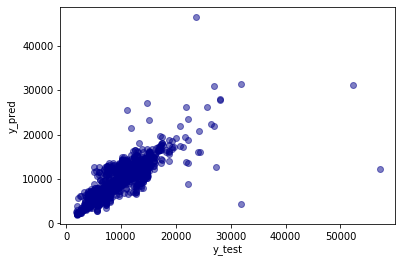

In [83]:
plt.scatter(y_test,y_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
from sklearn import metrics



In [85]:
print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1256.6849446474369
MSE: 6036882.882228949
RMSE: 2457.0068950308114


In [86]:
metrics.r2_score(y_test, y_pred)

0.7164624883154942

*we have to bring the main_test in same format as that of the X_train
 1. Do same preprocessing steps
 2. Do same feature engg
 3. Do same feature selection
 4. fed to model and predict



In [87]:
main_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,NaN
10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,NaN
10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,NaN
10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,NaN
10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,NaN


In [88]:
X_train.head()

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Dep_hour,Dep_min,Airline_enc,Route_enc
0,1,6,0,170,24,3,22,20,3,16
1,4,1,2,445,5,1,5,50,1,78
2,3,2,2,1140,6,9,9,25,4,112
3,4,1,1,325,5,12,18,5,3,85
4,1,6,1,285,3,1,16,50,3,26


In [89]:
X_main_test = main_test.drop(['Price'],axis=1)
X_main_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min
10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655
10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240
10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425
10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780
10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170
...,...,...,...,...,...,...,...,...
13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435
13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155
13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395
13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915


In [90]:
X_main_test['Date_of_Journey'] = pd.to_datetime(X_main_test['Date_of_Journey'])

In [91]:
X_main_test['Airline'] = np.where(X_main_test['Airline'].isin(["Multiple carriers Premium economy",
                                                             "Jet Airways Business",
                                                             "Vistara Premium economy",
                                                             "Trujet"]),"Other Airlines",X_main_test['Airline'])

In [92]:
X_main_test.sort_values(by=['Date_of_Journey'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min
12767,Air India,2019-01-03,Banglore,New Delhi,BLR → GAU → DEL,13:50,1 stop,500
13263,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55,1 stop,730
11792,IndiGo,2019-01-03,Banglore,New Delhi,BLR → STV → DEL,11:20,1 stop,245
12886,IndiGo,2019-01-03,Mumbai,Hyderabad,BOM → HYD,19:05,non-stop,85
12543,Air India,2019-01-03,Banglore,New Delhi,BLR → VGA → VTZ → DEL,10:30,2 stops,1430
...,...,...,...,...,...,...,...,...
12135,SpiceJet,2019-12-06,Chennai,Kolkata,MAA → CCU,09:45,non-stop,135
13097,IndiGo,2019-12-06,Kolkata,Banglore,CCU → BLR,22:15,non-stop,155
12605,Air India,2019-12-06,Delhi,Cochin,DEL → TRV → COK,05:15,1 stop,1535
12038,SpiceJet,2019-12-06,Chennai,Kolkata,MAA → CCU,08:20,non-stop,135


In [93]:
X_main_test["Journey_day"] =pd.to_datetime(X_main_test["Date_of_Journey"],format="%d/%m/%Y").dt.day
X_main_test["Journey_month"] =pd.to_datetime(X_main_test["Date_of_Journey"],format="%d/%m/%Y").dt.month
X_main_test["Journey_year"] =pd.to_datetime(X_main_test["Date_of_Journey"],format="%d/%m/%Y").dt.year


In [94]:
#since we have extracted all info from Date_of_journey we can drop that column
X_main_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [95]:
# Departure time is when a plane leaves the gate of airport 
#Extracting Hours 
X_main_test["Dep_hour"] = pd.to_datetime(X_main_test["Dep_Time"]).dt.hour

# Extracting Minutes 
X_main_test["Dep_min"] = pd.to_datetime(X_main_test["Dep_Time"]).dt.minute



In [96]:
# Now we can drop Dep_Time as we have extracted information from it
X_main_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [97]:
#We are encoding it just to convert airline into int 

from sklearn.preprocessing import LabelEncoder
Airline_encoder = LabelEncoder()
Airline_encoder.fit(X_main_test['Airline'])
X_main_test['Airline_enc'] = Airline_encoder.transform(X_main_test['Airline'])

In [98]:
X_main_test[['Airline_enc','Airline']]

,Airline_enc,Airline
10682,4,Jet Airways
10683,3,IndiGo
10684,4,Jet Airways
10685,5,Multiple carriers
10686,0,Air Asia
...,...,...
13347,1,Air India
13348,3,IndiGo
13349,4,Jet Airways
13350,1,Air India


In [99]:
X_main_test.drop(['Airline'], axis =1,inplace=True)

In [100]:
# label enceode route as well
route_encoder = LabelEncoder()

route_encoder.fit(X_main_test['Route'])

X_main_test['Route_enc'] = route_encoder.transform(X_main_test['Route'])




In [101]:
X_main_test.drop(['Route'], axis =1,inplace=True)

In [102]:
# we will encode SOURCE
# make a map dictionary to encode SOURCE column 
labels = X_main_test['Source'].astype('category').cat.categories.tolist()
mapper1 = {q: w for q,w in zip(labels,list(range(1,len(labels)+1)))}
X_main_test['Source'] = X_main_test['Source'].map(mapper1)
X_main_test['Source'] =X_main_test['Source'].replace(np.nan, 0)

In [103]:
# we will encode SOURCE
# make a map dictionary to encode Destination column 
labels = X_main_test['Destination'].astype('category').cat.categories.tolist()
mapper1 = {q: w for q,w in zip(labels,list(range(1,len(labels)+1)))}
X_main_test['Destination'] = X_main_test['Destination'].map(mapper1)
X_main_test['Destination'] = X_main_test['Destination'].replace(np.nan, 0)

In [104]:
X_main_test["Total_Stops"] = X_main_test["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)

In [105]:
X_main_test.drop(['Journey_year'], axis =1,inplace=True)

In [106]:
X_main_test.head()

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Dep_hour,Dep_min,Airline_enc,Route_enc
10682,3,2,1,655,6,6,17,30,4,75
10683,4,1,1,240,5,12,6,20,3,64
10684,3,2,1,1425,21,5,19,15,4,75
10685,3,2,1,780,21,5,8,0,5,75
10686,1,3,0,170,24,6,23,55,0,16


In [107]:
X_train.head()

,Source,Destination,Total_Stops,total_duration_min,Journey_day,Journey_month,Dep_hour,Dep_min,Airline_enc,Route_enc
0,1,6,0,170,24,3,22,20,3,16
1,4,1,2,445,5,1,5,50,1,78
2,3,2,2,1140,6,9,9,25,4,112
3,4,1,1,325,5,12,18,5,3,85
4,1,6,1,285,3,1,16,50,3,26


In [108]:
#now we are done with making our main_test fit for model

In [109]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [110]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [111]:
y_predict2 = regressor.predict(X_val)

In [112]:
# PREDICT IT 

final_result = regressor.predict(X_main_test)

In [113]:
final_result = pd.Series(final_result,name='Predicted_Price')

In [114]:
main_test.reset_index(drop=True,inplace=True)

In [115]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final 

,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price,Predicted_Price
0,10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,NaN,12463.063173
1,10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,NaN,5913.272512
2,10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,NaN,12463.063173
3,10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,NaN,9851.501722
4,10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,NaN,4681.839544
...,...,...,...,...,...,...,...,...,...,...,...
2665,13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,NaN,7867.000000
2666,13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,NaN,4681.839544
2667,13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,NaN,15876.991968
2668,13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,NaN,12843.463687


In [116]:
Final.round(1)


,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price,Predicted_Price
0,10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,NaN,12463.1
1,10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,NaN,5913.3
2,10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,NaN,12463.1
3,10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,NaN,9851.5
4,10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,NaN,4681.8
...,...,...,...,...,...,...,...,...,...,...,...
2665,13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,NaN,7867.0
2666,13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,NaN,4681.8
2667,13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,NaN,15877.0
2668,13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,NaN,12843.5


In [117]:
Final.sort_values(by=['Predicted_Price'])

,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price,Predicted_Price
1053,11735,SpiceJet,01-04-2019,Mumbai,Hyderabad,BOM → HYD,22:45,non-stop,90,NaN,2899.300000
1051,11733,SpiceJet,06-05-2019,Mumbai,Hyderabad,BOM → HYD,13:15,non-stop,90,NaN,2899.300000
94,10776,Air India,27-06-2019,Mumbai,Hyderabad,BOM → HYD,19:30,non-stop,75,NaN,2899.300000
1856,12538,Air India,24-06-2019,Mumbai,Hyderabad,BOM → HYD,13:55,non-stop,90,NaN,2899.300000
2436,13118,Air India,01-04-2019,Mumbai,Hyderabad,BOM → HYD,13:55,non-stop,90,NaN,2899.300000
...,...,...,...,...,...,...,...,...,...,...,...
2327,13009,Jet Airways,01-03-2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,1 stop,1005,NaN,26401.215686
1802,12484,Jet Airways Business,01-03-2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,1 stop,450,NaN,26401.215686
233,10915,Jet Airways,01-03-2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,1 stop,565,NaN,26401.215686
398,11080,Jet Airways,01-03-2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,1 stop,1235,NaN,26401.215686
